<a href="https://colab.research.google.com/github/Shaharsha16/week3/blob/main/internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/my-drive')

Mounted at /my-drive


In [ ]:
import zipfile

zip_path = "Tree_Species_Dataset.zip"  # Use exact name shown after upload
extract_path = "Tree_Species_Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)

Dataset extracted to: Tree_Species_Dataset


In [ ]:
import os

print("Folders in dataset:")
print(os.listdir(extract_path))


Folders in dataset:
['Tree_Species_Dataset']


In [ ]:
!ls /my-drive/MyDrive/*.zip


'/my-drive/MyDrive/archive(5).zip'
 /my-drive/MyDrive/Tree_Species_Dataset.zip
 /my-drive/MyDrive/Tree_species-master.zip


Number of Classes: 30
Class Names: ['amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


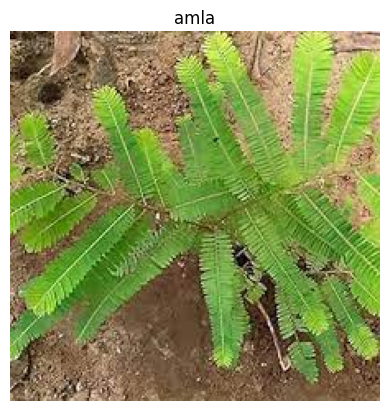

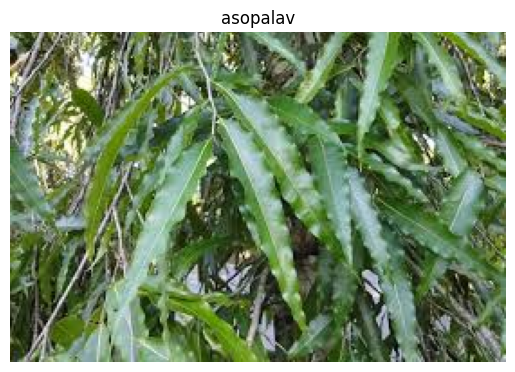

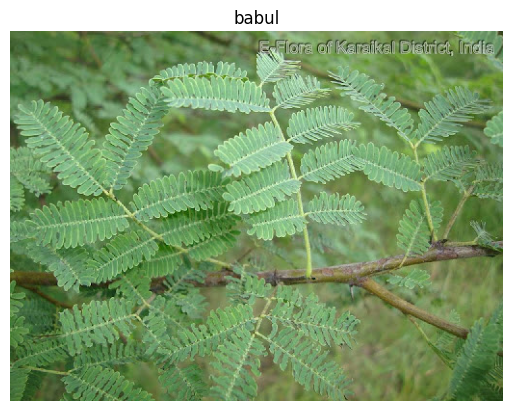

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dataset_path = "/content/dataset/Tree_Species_Dataset"
labels = sorted(os.listdir(dataset_path))
print("Number of Classes:", len(labels))
print("Class Names:", labels)

# Show 1 image from each of the first 3 classes
for label in labels[:3]:
    class_path = os.path.join(dataset_path, label)
    img_list = os.listdir(class_path)
    if img_list:
        img_path = os.path.join(class_path, img_list[0])
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
        plt.show()


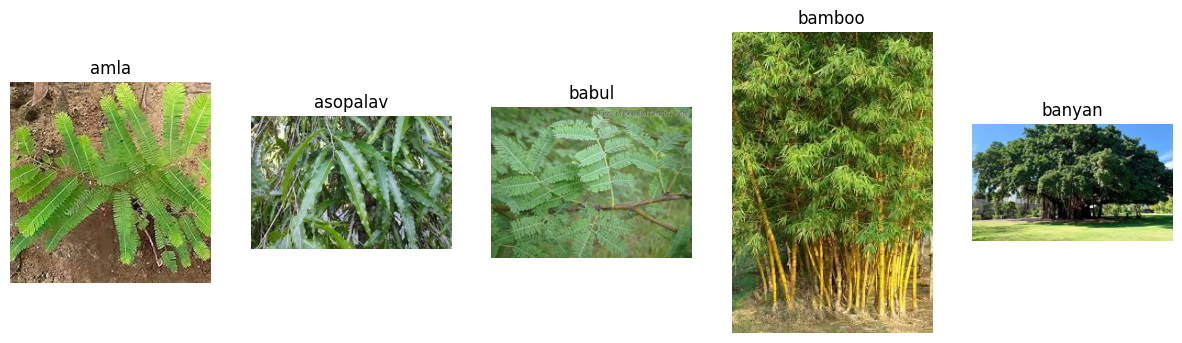

In [25]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set your dataset path
repo_path = "/content/Tree_Species_Dataset"
class_dirs = sorted(os.listdir(repo_path))

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_folder = os.path.join(repo_path, class_dir)
        img_files = os.listdir(img_folder)


        if len(img_files) == 0:
            continue

        img_path = os.path.join(img_folder, img_files[0])
        img = Image.open(img_path)

        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')

    plt.show()


show_sample_images(repo_path, class_dirs)

In [26]:
import os
import hashlib
from collections import defaultdict
from PIL import Image

# Define dataset path
repo_path = "/content/Tree_Species_Dataset"
class_dirs = sorted(os.listdir(repo_path))


#  Check for duplicate images

hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)
        except Exception as e:
            print(f"Error reading {img_path}: {e}")

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("✅ Duplicate image sets found:", len(duplicates))



#  Check for corrupted images

corrupt_images = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # Will raise if image is corrupt
        except Exception as e:
            corrupt_images.append(img_path)

print("✅ Corrupted images found:", len(corrupt_images))


✅ Duplicate image sets found: 82
✅ Corrupted images found: 0


🔁 Duplicate set 1:



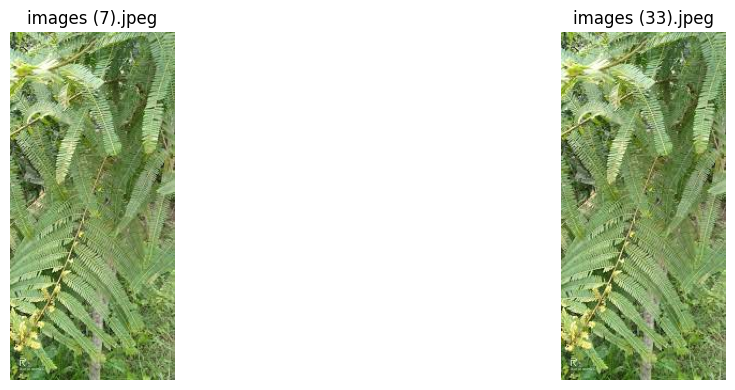

🔁 Duplicate set 2:



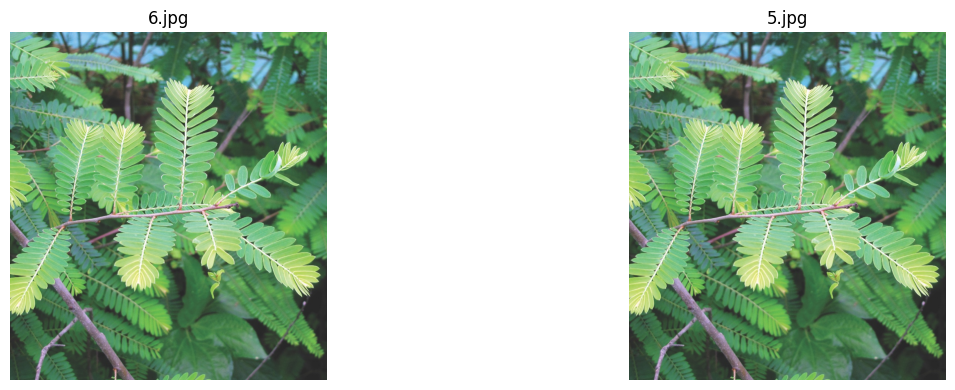

🔁 Duplicate set 3:



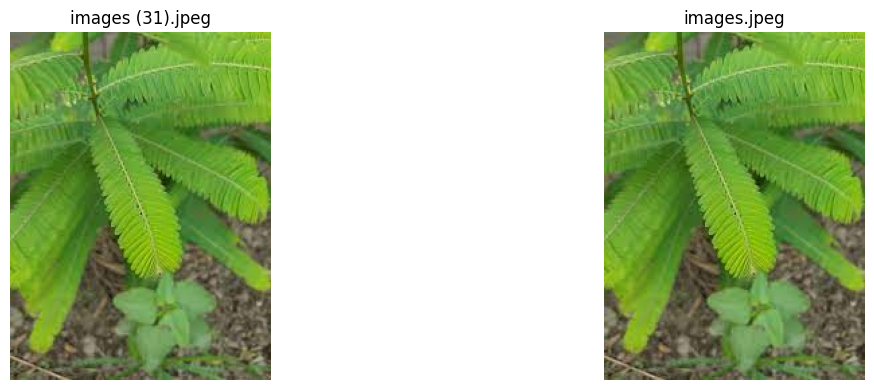

In [27]:
import matplotlib.pyplot as plt
from PIL import Image
import os


def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break

        print(f"🔁 Duplicate set {shown + 1}:\n")
        plt.figure(figsize=(15, 4))

        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)

                plt.subplot(1, len(dup_paths), i + 1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')

            except Exception as e:
                print(f"Error reading {img_path}: {e}")
                continue

        plt.tight_layout()
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1280 images belonging to 30 classes.
Found 320 images belonging to 30 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(labels), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

# Save the trained model
model.save("basic_cnn_tree_species.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.0593 - loss: 7.2989 - val_accuracy: 0.1063 - val_loss: 3.2364
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.1274 - loss: 3.1328 - val_accuracy: 0.2250 - val_loss: 2.8209
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.3907 - loss: 2.2474 - val_accuracy: 0.2812 - val_loss: 2.7419
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.7190 - loss: 1.2140 - val_accuracy: 0.3344 - val_loss: 2.7147
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.9289 - loss: 0.3785 - val_accuracy: 0.3594 - val_loss: 3.0784


In [21]:
from google.colab import files
files.download("basic_cnn_tree_species.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Path to your dataset
dataset_path = "/content/dataset/Tree_Species_Dataset"
img_size = (224, 224)
batch_size = 32

# View classes
labels = sorted(os.listdir(dataset_path))
print("Classes:", labels)

# Setup train/val generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(labels), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[EarlyStopping(patience=2)]
)

# Save the model as .h5
model.save("basic_cnn_tree_species.h5")
print("✅ Model saved as basic_cnn_tree_species.h5")


Classes: ['amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']
Found 1280 images belonging to 30 classes.
Found 320 images belonging to 30 classes.
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.0599 - loss: 6.3380 - val_accuracy: 0.1406 - val_loss: 3.1618
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.2109 - loss: 2.9924 - val_accuracy: 0.2062 - val_loss: 2.9484
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.3502 - loss: 2.4286 - val_accuracy: 0.2531 - val_loss: 2.7837
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.6925 - loss: 1.3183 - val_accuracy: 0.3438 - val_loss: 2.6341
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.9088 - loss: 0.4522 - val_

✅ Model saved as basic_cnn_tree_species.h5


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/Tree_Species_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/Tree_Species_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1280 images belonging to 30 classes.
Found 320 images belonging to 30 classes.


In [18]:
# Step 1: Import required libraries
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 2: Set up image data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/Tree_Species_Dataset',  # <-- Update this path if needed
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    '/content/Tree_Species_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Step 3: Load EfficientNetB0 without top layers
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base model

# Step 4: Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# Step 5: Build and compile the model
model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 6: Train the model
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

# Step 7: Save the model in modern format
model.save('efficientnet_tree_species.keras')  # preferred over .h5


Found 1280 images belonging to 30 classes.
Found 320 images belonging to 30 classes.
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.0714 - loss: 3.4292 - val_accuracy: 0.0938 - val_loss: 3.3918
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.0870 - loss: 3.3909 - val_accuracy: 0.0938 - val_loss: 3.3722
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.1002 - loss: 3.3720 - val_accuracy: 0.0938 - val_loss: 3.3729
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.0887 - loss: 3.3764 - val_accuracy: 0.0938 - val_loss: 3.3666
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.0802 - loss: 3.3870 - val_accuracy: 0.0938 - val_loss: 3.3661


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model_bn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_bn.fit(train_generator, validation_data=val_generator, epochs=5)

model_bn.save('cnn_batchnorm_tree_species.h5')


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 249s 6s/step - accuracy: 0.0457 - loss: 13.9186 - val_accuracy: 0.0656 - val_loss: 10.3996
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 272s 6s/step - accuracy: 0.0950 - loss: 3.4035 - val_accuracy: 0.0250 - val_loss: 12.5059
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 257s 6s/step - accuracy: 0.0907 - loss: 3.3953 - val_accuracy: 0.0281 - val_loss: 5.0498
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 245s 6s/step - accuracy: 0.1035 - loss: 3.4379 - val_accuracy: 0.0688 - val_loss: 3.6364
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 258s 6s/step - accuracy: 0.0864 - loss: 3.3907 - val_accuracy: 0.0375 - val_loss: 4.2972
